In [1]:
import pandas as pd

pre_data = pd.read_csv("/Users/ramyaviswanath/Desktop/untitled folder/pre_cleaned_data2.csv")
pandemic_data = pd.read_csv("/Users/ramyaviswanath/Desktop/untitled folder/pandemic_data2.csv")
post_data = pd.read_csv("/Users/ramyaviswanath/Desktop/untitled folder/post_cleaned_data2.csv")

In [3]:
print(pre_data.head)
print(pandemic_data.head)
print(post_data.head)

<bound method NDFrame.head of           STATION ID  BIKE STANDS  AVAILABLE BIKE STANDS  AVAILABLE BIKES  \
0                  1           31                      1               30   
1                  1           31                      2               29   
2                  1           31                      2               29   
3                  1           31                      2               29   
4                  1           31                      3               28   
...              ...          ...                    ...              ...   
17857982         117           40                     37                3   
17857983         117           40                     37                3   
17857984         117           40                     37                3   
17857985         117           40                     37                3   
17857986         117           40                     37                3   

          OCCUPANCY  FULL  EMPTY  DAY_NUMBER 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_pre = pre_data.drop(['AVAILABLE BIKES'], axis=1)
y_pre = pre_data['AVAILABLE BIKES']
X_train, X_test, y_train, y_test = train_test_split(X_pre, y_pre, test_size=0.2, random_state=42)

# Training the Lasso model
lasso_model_pre = Lasso(alpha=0.5) 
lasso_model_pre.fit(X_train, y_train)
y_pre_prediction = lasso_model_pre.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pre_prediction))
mse = mean_squared_error(y_test, y_pre_prediction)
r2 = r2_score(y_test, y_pre_prediction)

print('Pre-Pandemic Test RMSE:', rmse_test)
print("MSE :", mse)
print("R2 :", r2)


Pre-Pandemic Test RMSE: 2.7980610196436495
MSE : 7.82914546964926
R2 : 0.9353521246972497


In [5]:
#Applying the model to pandemic data
X_pandemic = pandemic_data.drop(['AVAILABLE BIKES'], axis=1)
y_pandemic = pandemic_data['AVAILABLE BIKES']
y_pandemic_prediction = lasso_model_pre.predict(X_pandemic)

rmse_pandemic = np.sqrt(mean_squared_error(y_pandemic,y_pandemic_prediction))
mse_pp = mean_squared_error(y_pandemic, y_pandemic_prediction)
r2_pp = r2_score(y_pandemic,y_pandemic_prediction)

print('Pandemic RMSE:', rmse_pandemic)
print("MSE :",mse_pp)
print("R2 :",r2_pp)

Pandemic RMSE: 1.021427223965156
MSE : 1.0433135738571653
R2 : 0.9840874565745018


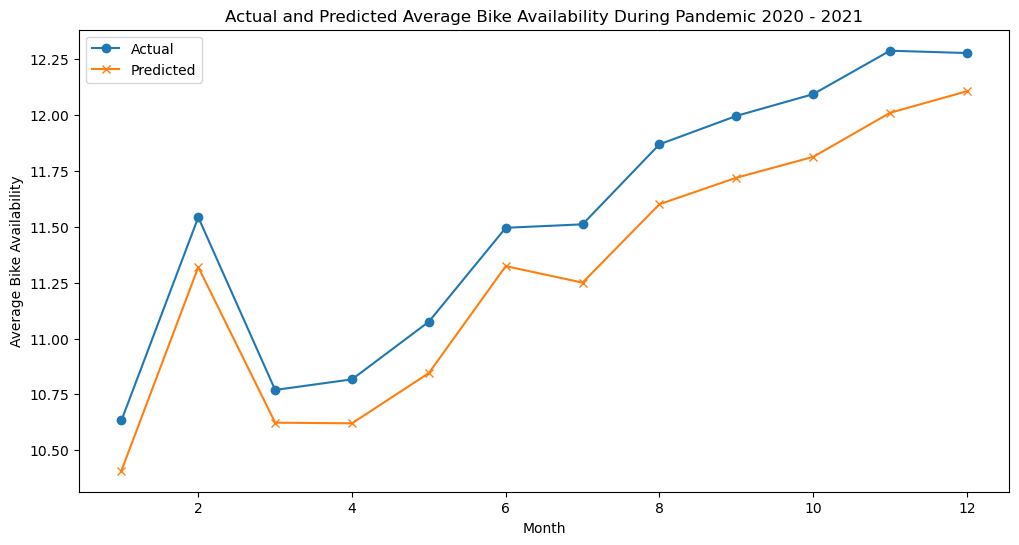

In [6]:
import matplotlib.pyplot as plt

pandemic_data['Predicted Bikes'] = y_pandemic_prediction

# Group the data by month, and calculate the average of actual and predicted values for each month
monthly_data = pandemic_data.groupby('MONTH').mean()[['AVAILABLE BIKES', 'Predicted Bikes']]
plt.figure(figsize=(12, 6))
months = monthly_data.index

plt.plot(months, monthly_data['AVAILABLE BIKES'], label='Actual', marker='o')
plt.plot(months, monthly_data['Predicted Bikes'], label='Predicted', marker='x')


plt.title('Actual and Predicted Average Bike Availability During Pandemic 2020 - 2021')
plt.xlabel('Month')
plt.ylabel('Average Bike Availability')
plt.legend()
plt.show()



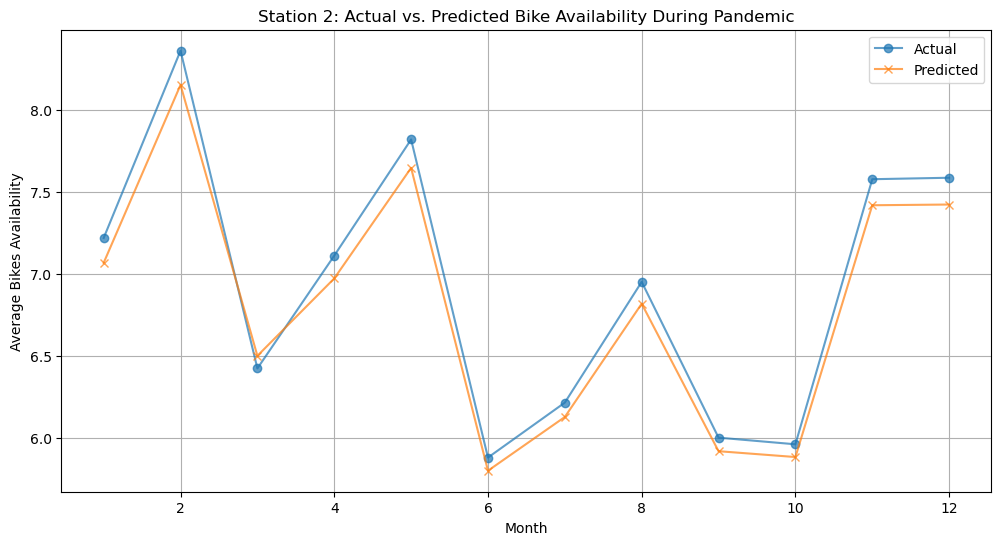

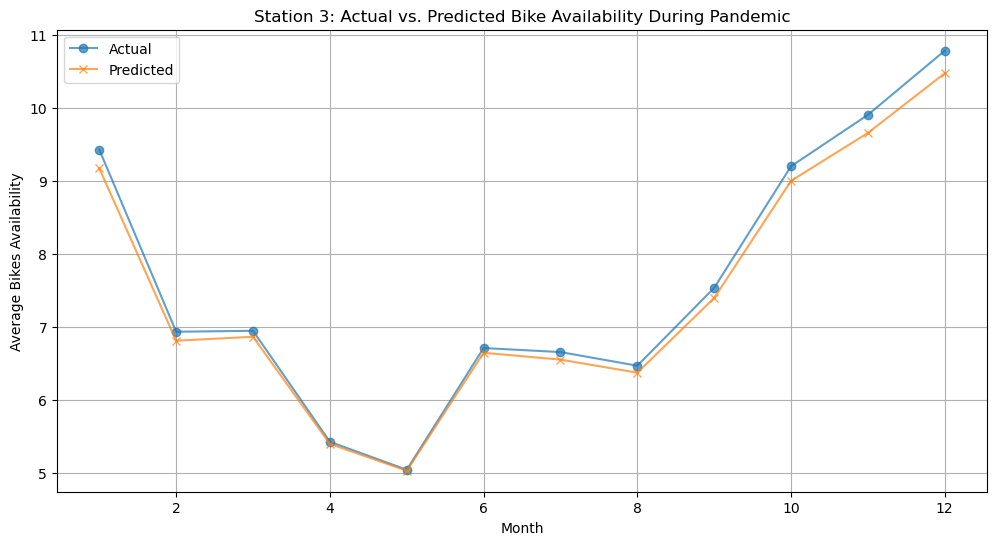

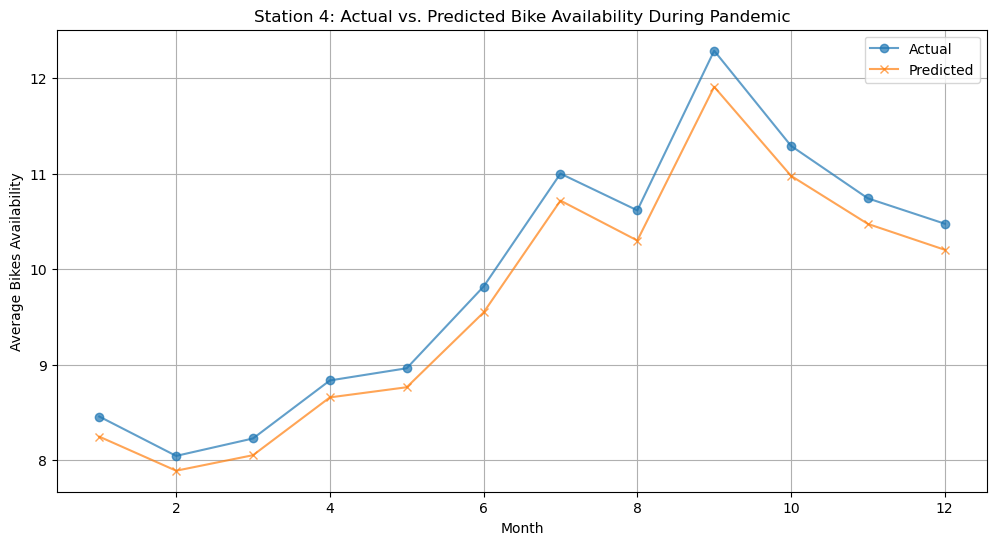

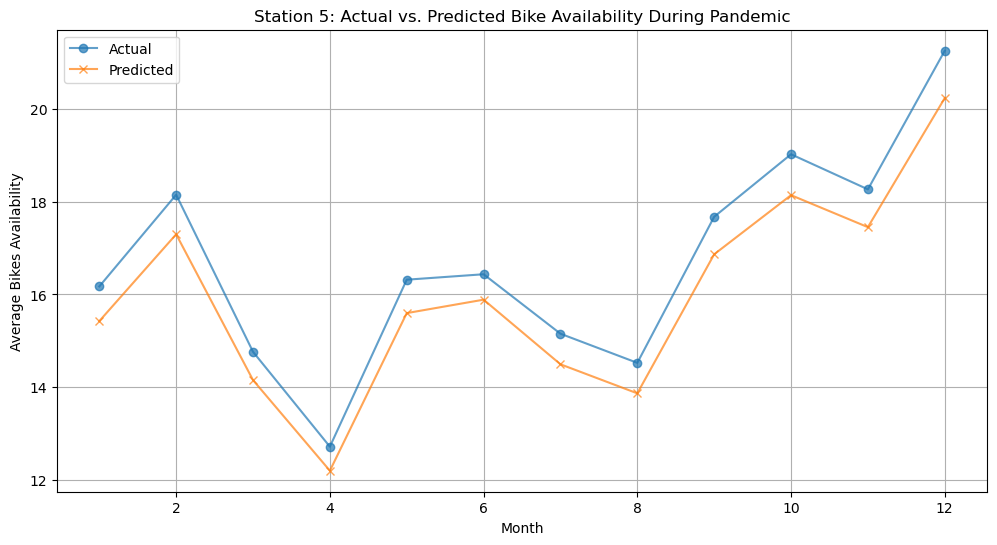

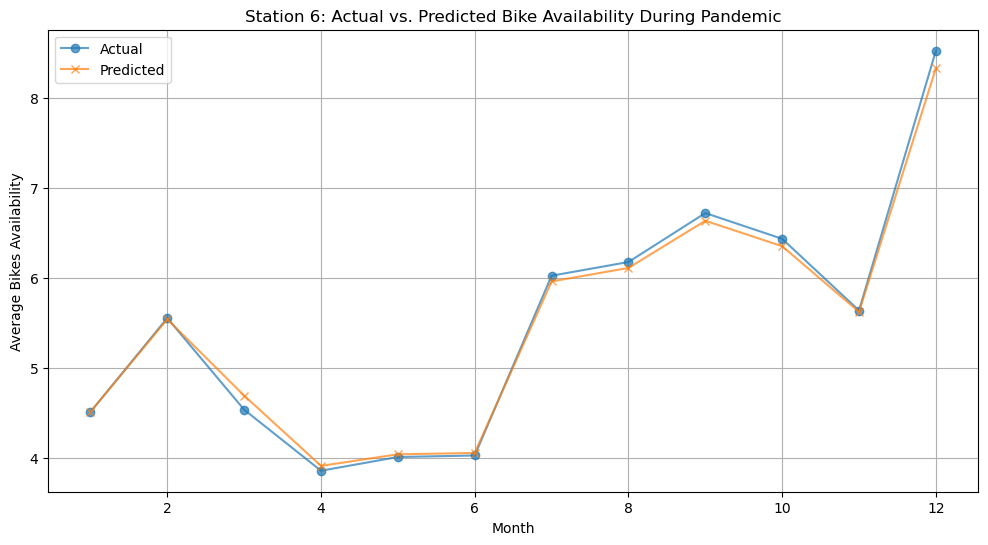

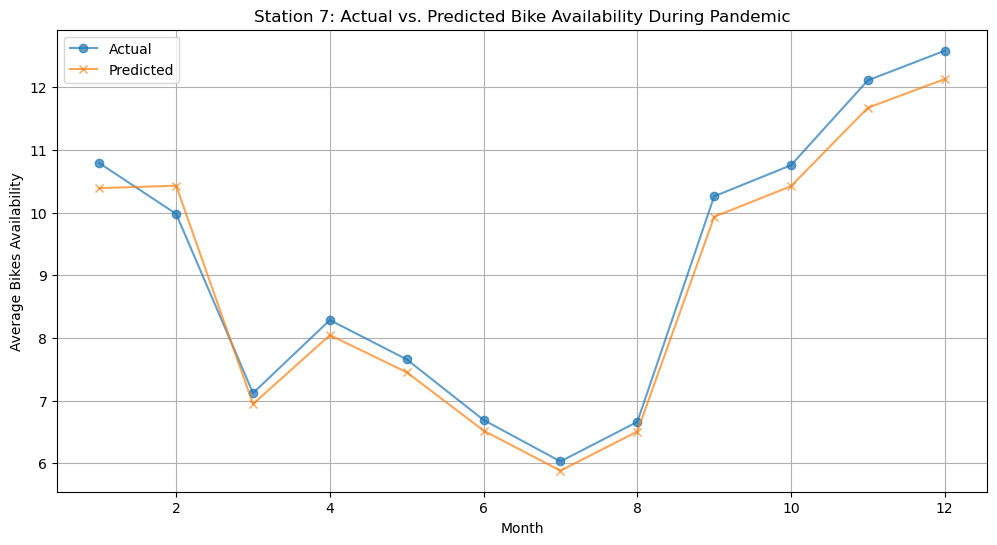

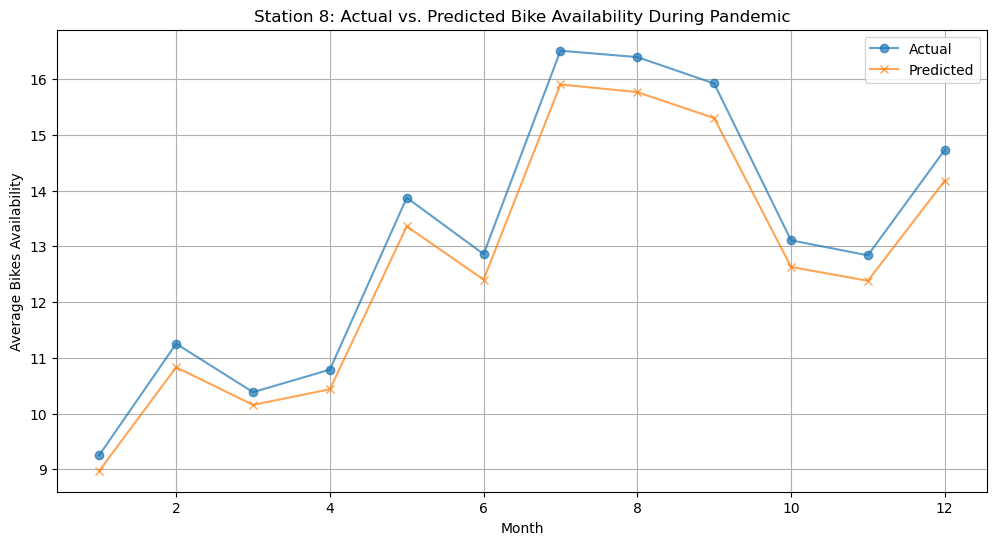

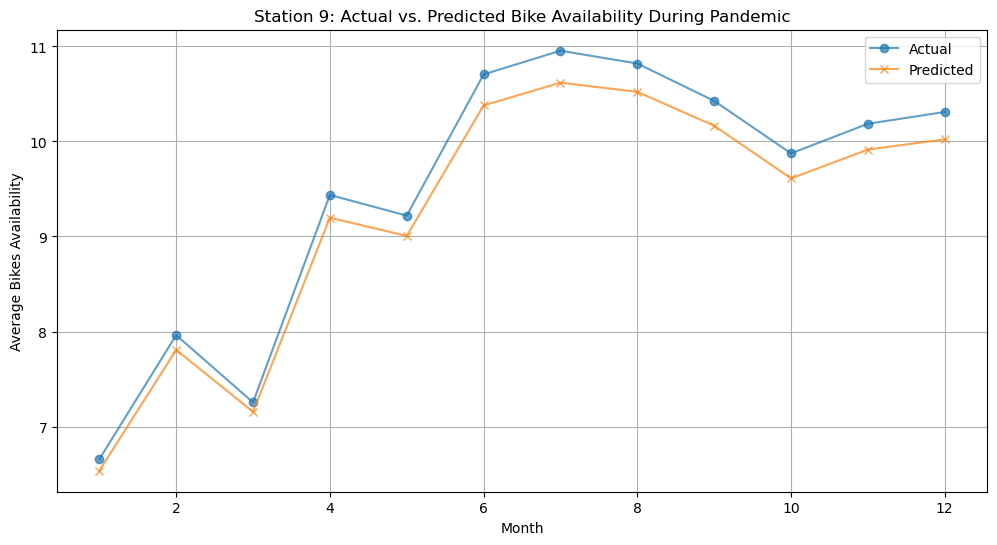

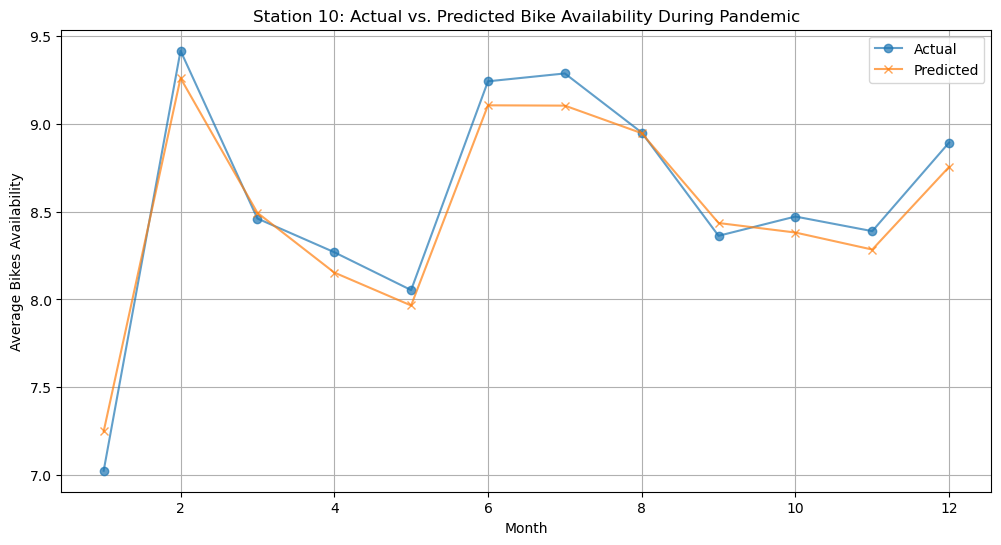

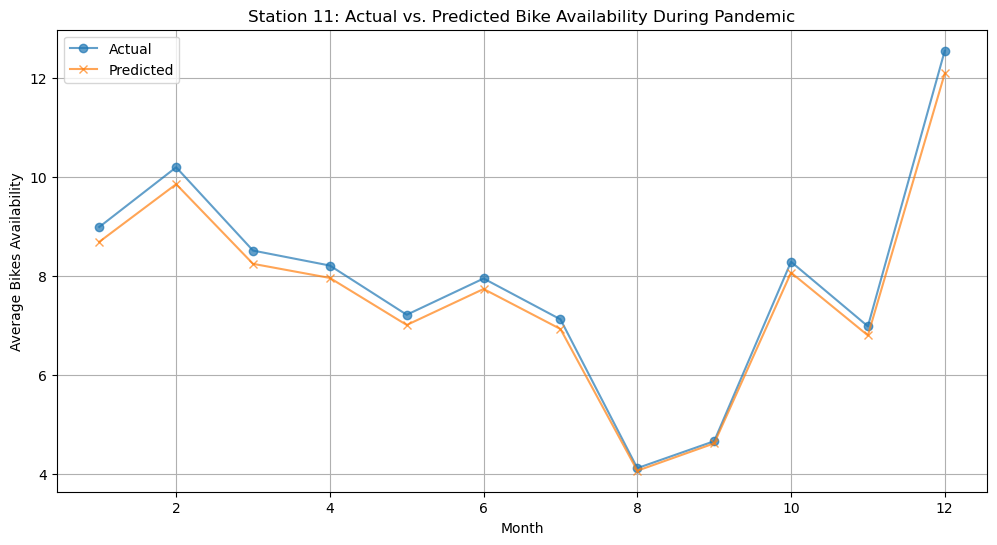

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

station_ids = list(range(2, 12))

for station_id in station_ids:

    station_data = pandemic_data[pandemic_data['STATION ID'] == station_id]
    plt.figure(figsize=(12, 6))
    grouped_data = station_data.groupby('MONTH')[['AVAILABLE BIKES', 'Predicted Bikes']].mean()
    
    plt.plot(grouped_data.index, grouped_data['AVAILABLE BIKES'], label='Actual', marker='o', linestyle='-', alpha=0.7)
    plt.plot(grouped_data.index, grouped_data['Predicted Bikes'], label='Predicted', marker='x', linestyle='-', alpha=0.7)
    
   
    plt.title(f'Station {station_id}: Actual vs. Predicted Bike Availability During Pandemic')
    plt.xlabel('Month')
    plt.ylabel('Average Bikes Availability')
    plt.legend()
    
    plt.grid(True)
    plt.show()
